Determining the age of an abalone is a time-consuming task and it is desirable to determine the age from physical details alone.

This is a dataset that describes the physical details of abalone and requires predicting the number of rings of the abalone, which is a proxy for the age of the creature.

- Gender: M, F, and I (infant)
- Length (m): Longest shell measurement
- Diameter (m): perpendicular to length
- Height (m): with meat in shell
- Whole weight (kilograms):	whole abalone
- Shucked weight (kilograms): weight of meat
- Viscera weight (kilograms): gut weight (after bleeding)
- Shell weight (kilograms):	after being dried
- Rings	(integer): +1.5 gives the age in years

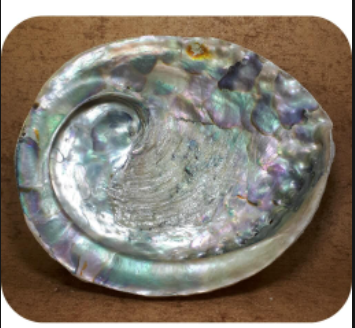

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

2.8.0


In [13]:
# load dataset
col_names = ['gender','length','diameter','height','whole_height','shucked_weight','viscera_weight','shell_weight','rings']
data = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/abalone.csv', names=col_names)
data.head()

,gender,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Give the statistics of the data

In [50]:
data.describe()

,gender,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Replace gender by 0, 1, 2. Use a dictionary.

What is X_train, y_train, X_test, y_test?

What is X_train, y_train, X_val, y_val?

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

Shape of x_train: (3007, 8)
Shape of x_test: (418, 8)
Shape of x_val: (752, 8)
Shape of y_train: (3007,)
Shape of y_test: (418,)
Shape of y_val: (752,)


Transform X_train, X_val and X_test into an array

X_train shape: (3007, 8)
<class 'numpy.ndarray'>


Create a small ANN model to predict the rings.

Compile the model.

Train the model.

Evaluate the model

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Epoch 1/150
94/94 - 1s - loss: 55.7106 - mean_squared_error: 55.7106 - val_loss: 16.1189 - val_mean_squared_error: 16.1189 - 501ms/epoch - 5ms/step
Epoch 2/150
94/94 - 0s - loss: 29.0962 - mean_squared_error: 29.0962 - val_loss: 14.8341 - val_mean_squared_error: 14.8341 - 89ms/epoch - 952us/step
Epoch 3/150
94/94 - 0s - loss: 23.2484 - mean_squared_error: 23.2484 - val_loss: 12.8930 - val_mean_squared_error: 12.8930 - 78ms/epoch - 829us/step
Epoch 4/150
94/94 - 0s - loss: 20.9619 - mean_squared_error: 20.9619 - val_loss: 14.5174 - val_mean_squared_error: 14.5174 - 84ms/epoch - 896us/step
Epoch 5/150
94/94 - 0s - loss: 19.2927 - mean_squared_error: 19.2927 - val_loss: 11.9478 - val_mean_squared_error: 11.9478 - 82ms/epoch - 875us/step
Epoch 6/150
94/94 - 0s - loss: 16.8474 - mean_squared_error: 16.8474 - val_loss: 10.5078 - val_mean_squared_error: 10.5078 - 83ms/epoch - 883us/step
Epoch 7/150
94/94 - 0s - loss: 16.6151 - mean_squared_error: 16.6151 - val_loss: 12.6982 - val_mean_squared

[4.140047550201416, 4.140047550201416]

Make the following plots

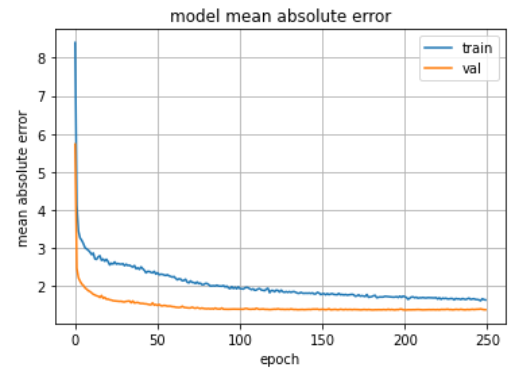

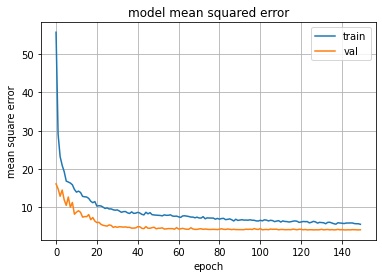

Evaluate the model using the test set.

RMSE: 2.150
